# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



ModuleNotFoundError: No module named 'excel'

## Generate Latitudes and Longitudes

In [37]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations to consider the full range of geographies
# lats = np.random.uniform(low=-90.000, high=90.000, size=5)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=5)

# #Yields a zip object, an iterable of tuples of lats and lngs
# lat_lngs = zip(lats, lngs)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Define list for housing dictionaries of city weather information
city_dict = []

#Define index/increment variable
ind = 0

#Set of unique city names that have been called.  This will prevent unnecessary API calls for cities with bad JSON responses.
city_names = []

# Base url for API call
url_source = "http://api.openweathermap.org/data/2.5/weather?"

# Number of unique cities desired
num_cities = 61

In [39]:

# Loop until you have X number of randomly chosen cities and their associated weather data
while ind < num_cities:
    
    # Generate random latitude and longitude 
    lat = np.random.uniform(low=-90.000, high=90.000)
    lng = np.random.uniform(low=-180.000, high=180.000)

    # Identify nearest city for lat / lng combination
    city = citipy.nearest_city(lat, lng).city_name
    
    # Skip everything else and start again if the city name is already in our city names list
    if city in city_names:
        continue
    
    # Add unique city name to city_names list
    city_names.append(city)
    #city_names.add(city)
      
    # Construct URI for API call
    query_url = url_source + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # Call API and JSONify the API response
    weather_json = requests.get(query_url).json()
    
    # Define function to test validity of JSON response from openweather
    def isGoodData(json):
        return json['cod'] == 200 #could just use return json['Name'], will be False if not present
    
    # If the city has good data (returns code 200), add it to a our cities list of dictionaries
    if isGoodData(weather_json):
        city_dict.append({})
        city_dict[ind]['Name'] = city
        city_dict[ind]['Country'] = weather_json['sys']['country']
        city_dict[ind]['ID'] = weather_json['id']
        city_dict[ind]['Latitude'] = weather_json['coord']['lat']
        city_dict[ind]['Longitude'] = weather_json['coord']['lon']
        city_dict[ind]['Max Temp'] = weather_json['main']['temp_max'] #need this in F
        city_dict[ind]['Clouds'] = weather_json['clouds']['all']
        city_dict[ind]['Wind Speed'] = weather_json['wind']['speed']
        city_dict[ind]['Humidity'] = weather_json['main']['humidity']
        
        # Increment our index if we've collected data for another city
        ind += 1
        # Log the city
        print(f"City Name: {weather_json['name']} - City ID: {weather_json['id']}")

City Name: Port Alfred - City ID: 964432
City Name: Makat - City ID: 608872
City Name: Saint George - City ID: 262462
City Name: Tiksi - City ID: 2015306
City Name: Longyearbyen - City ID: 2729907
City Name: Hasaki - City ID: 2112802
City Name: Avarua - City ID: 4035715
City Name: Georgetown - City ID: 3378644
City Name: Khatanga - City ID: 2022572
City Name: Hobart - City ID: 2163355
City Name: Mataura - City ID: 6201424
City Name: Belaya Gora - City ID: 2126785
City Name: Bundaberg - City ID: 2173323
City Name: Berlevag - City ID: 780687
City Name: Ribeira Grande - City ID: 3372707
City Name: Hermanus - City ID: 3366880
City Name: Hay River - City ID: 5972762
City Name: Yellowknife - City ID: 6185377
City Name: Vaini - City ID: 1273574
City Name: Mount Gambier - City ID: 2156643
City Name: Atuona - City ID: 4020109
City Name: Dingle - City ID: 1714733
City Name: Brewster - City ID: 4931273
City Name: Thompson - City ID: 6165406
City Name: Bredasdorp - City ID: 1015776
City Name: Alba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
#print(city_dict)
city_df = pd.DataFrame(city_dict)
city_df.head()

,Clouds,Country,Humidity,ID,Latitude,Longitude,Max Temp,Wind Speed
0,8,ZA,94,964432,-33.59,26.89,69.18,3.96
1,44,KZ,95,608872,47.65,53.35,12.16,11.01
2,90,GR,100,262462,39.45,22.34,35.60,1.16
3,36,RU,0,2015306,71.64,128.87,-38.47,5.08
4,20,NO,62,2729907,78.22,15.63,19.40,34.45


In [59]:
#Check total number of unique cities compiled
num_Cities = city_df['ID'].nunique()
num_Cities

61

In [69]:
city_df.to_csv(output_data_file)
# city_df['Latitude'] = city_df['Latitude'].astype(float)
# city_df['Max Temp'] = city_df['Max Temp'].astype(float)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

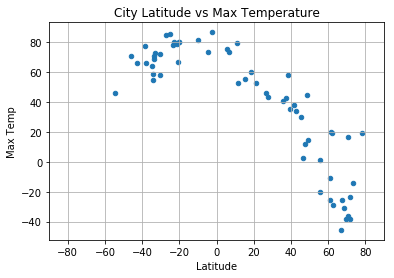

In [70]:

city_df.plot(kind="scatter", x = 'Latitude', y = 'Max Temp', grid=True, xlim=lat_range, title='City Latitude vs Max Temperature')
plt.savefig('output_data/latVsTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

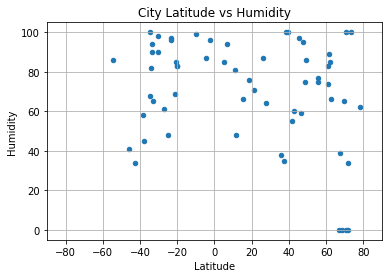

In [63]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Humidity', grid=True, xlim=lat_range, title='City Latitude vs Humidity')
plt.savefig('output_data/latVsHumid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

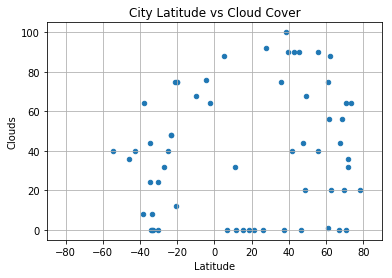

In [64]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Clouds', grid=True, xlim=lat_range, title='City Latitude vs Cloud Cover')
plt.savefig('output_data/latVsClouds.png')
plt.show()

#### Latitude vs. Wind Speed Plot

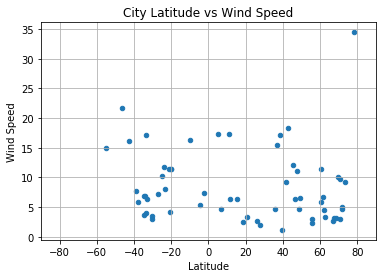

In [65]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Wind Speed', grid=True, xlim=lat_range, title='City Latitude vs Wind Speed')
plt.savefig('output_data/latVsWind.png')
plt.show()